In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

#内嵌画图
%matplotlib inline

使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。
Python提供了许多魔法命令，使得在IPython环境中的操作更加得心应手。魔法命令都以%或者%%开头，以%开头的成为行命令，%%开头的称为单元命令。行命令只对命令所在的行有效，而单元命令则必须出现在单元的第一行，对整个单元的代码进行处理。

In [73]:
data = pd.read_csv('california_housing_train.csv')
print (data.shape, data.shape)
data.head()

(17000, 9) (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


#选择数据集合中的几个重要特征

In [74]:
data_select = data[['housing_median_age','total_rooms','median_house_value']]
data_select = data_select.rename(columns = {'housing_median_age': 'house_age','median_house_value':'house_value'})
data_select = data_select.dropna(axis = 0)  #删除缺失数据（Nan）,axis = 0 表示删除行，axis = 1表示删除列，但是一般不删除列，列往往代表一个变量
for col in np.take(data_select.columns,[0,1,2]):
    data_select[col] /= data_select[col].max()
data_select.head() 

,house_age,total_rooms,house_value
0,0.288462,0.147929,0.1338
1,0.365385,0.201650,0.1602
2,0.326923,0.018979,0.1714
3,0.269231,0.039566,0.1468
4,0.384615,0.038327,0.1310


#三维张量，[[[0.288462,0.147929,0.1338],[0.365385,0.201650,0.1602]......]]

In [75]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_select.copy(), test_size = 0.9)
train.describe()

,house_age,total_rooms,house_value
count,1700.000000,1700.000000,1700.000000
mean,0.556686,0.069358,0.409387
std,0.243560,0.056015,0.227730
min,0.038462,0.000395,0.082000
25%,0.346154,0.038439,0.237600
50%,0.557692,0.056053,0.352899
75%,0.730769,0.082861,0.522049
max,1.000000,0.577194,1.000000


In [76]:
data_sample = data_select.head()
train_sample, test_sample = train_test_split(data_sample.copy(), test_size = 0.2)
train_sample.describe()

,house_age,total_rooms,house_value
count,4.000000,4.000000,4.000000
mean,0.326923,0.106868,0.142950
std,0.056614,0.081440,0.013403
min,0.269231,0.038327,0.131000
25%,0.283654,0.039256,0.133100
50%,0.326923,0.093748,0.140300
75%,0.370192,0.161360,0.150150
max,0.384615,0.201650,0.160200


# 暴力搜索

In [77]:
#模型函数
def linear(features, pars):
    price = np.sum(features*pars[:-1], axis = 1) + pars[-1] 
    return price

axis = 1表示第二层相加，如：
np.array([[[1,2],[3,4]],[[11,12],[13,14]]])
a.sum(axis = 0)
输出结果：array([[12, 14], [16, 18]])
a.sum(axis = 1)
输出结果：array([[4, 6], [24, 26]])
a.sum(axis = 2)
输出结果：array([[3, 7], [23, 27]])
具体可参考;https://blog.csdn.net/sky_kkk/article/details/79725646

In [78]:
#par1 = 0.1, par2 = 0.1
train['predict'] = linear(train[['house_age','total_rooms']].values, np.array([0.1, 0.1, 0]))
#注意二维张量train[['house_age','total_rooms']]，类似一个邮箱组里多个人的邮件，人是一个维度，邮箱组又是一个维度，所以是两个维度

train.head()

,house_age,total_rooms,house_value,predict
8147,0.384615,0.121254,1.000000,0.050587
9747,0.326923,0.033740,0.212600,0.036066
8135,0.807692,0.034083,0.935198,0.084178
6309,0.673077,0.037035,0.179600,0.071011
11659,0.500000,0.004244,0.324999,0.050424


# 代价函数

In [79]:
def mean_squared_error(y_pred, y):
    return sum(np.array(y_pred - y )**2)

def Cost(df, features, pars):
    df['predict'] = linear(df[features].values, pars)
    cost = mean_squared_error(df.predict, df.house_value)/len(df)
    return cost

cost = Cost(train, ['house_age','total_rooms'], np.array([0.1, 0.1, 0.0]))
print (len(train))
print (cost)
print (1700*cost)

1700
0.17100140202963426
290.70238345037825


# 暴力搜索

In [80]:
Xs = np.linspace(0, 1, 100)
Ys = np.linspace(0, 1, 100)
Zs = np.zeros([100,100])

Xs, Ys = np.meshgrid(Xs, Ys)
Xs.shape, Ys.shape

((100, 100), (100, 100))

In [81]:
W1 = []
W2 = []
Costs = []
for i in range(100):
    for j in range(100):
        W1.append(0.01*i)
        W2.append(0.01*j)
        Costs.append(Cost(train, ['house_age','total_rooms'], np.array([0.01*i, 0.01*j, 0.])))
#默认将输入数组展平。否则，按照axis方向
#按每列求出最小值的索引 axis=0
#按每行求出最小值的索引 axis=1
index = np.array(Costs).argmin()
print (W1[index], W2[index], Costs[index])

0.54 0.99 0.057889308825393775


Text(0.5, 0, 'total_rooms')

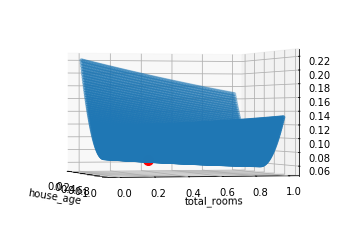

In [82]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.view_init(0, -15) #ax.view_init(elev=elev,azim=azim),改变绘制图像的视角,即相机的位置,azim沿着z轴旋转，elev沿着y轴
ax.scatter(W1, W2, Costs, s = 10) #画散点图，传入参数：数据，点的大小（可以随x大小变化），点的颜色等
ax.scatter(0.58, 0.28, zs = Cost(train, ['house_age','total_rooms'], np.array([0.58, 0.28, 0.0])), s = 100, c = 'r')
plt.xlabel('house_age')
plt.ylabel('total_rooms')

## 梯度法

In [83]:
def gradient(train, features, pars):
    #zeros(shape, dtype=float, order='C')，返回来一个给定形状和类型的用0填充的数组
    Gradient = np.zeros(len(pars))
    for i in range(len(pars)):
        pars_new = pars.copy()
        pars_new[i] += 0.01
        Gradient[i] = (Cost(train, features, pars_new) - Cost(train, features, pars))/0.01
        #print (Cost(train, features, pars))
    return Gradient
gradient(train, ['house_age','total_rooms'], [0.1, 0.1, 0])

array([-0.38409504, -0.05201841, -0.68356494])

In [84]:
#共迭代epochs=n次，每次pars取值都是沿着梯度方向减少pars - grad*lr（grad*lr为负值，减少负值意味着实际是增加），求出每次对应的Cost
def GradientDescent(data, epochs, lr, features, pars):
    Costs = []
    for i in range(epochs):
        grad = gradient(data, features, pars)
        if i%50 ==  0:
            Costs.append(Cost(data, features, pars))
        pars -= grad*lr #pars = pars - grad*lr，pars每个分量单独增加0.01，Cost变小，grad整体向下，说明pars各个参数可以增大一点，继续迭代
    print ('w = ', pars)
    print ('grad =', grad)
    return pars, Costs


        

In [85]:
pars, Costs = GradientDescent(train, 500, 0.002, ['house_age','total_rooms'], [0.1, 0.1, 0])

w =  [0.22802374 0.12231864 0.24276467]
grad = [-0.01793567 -0.00946891 -0.05265492]


pars增加0.01，梯度整体方向朝下，意味着Costs为负值，表示Costs减小，所以pars则可以继续微微增加，即pars = pars - grad*lr为何这儿不是加号一目了然；当pars取到靠近Costs值最小附近，grad趋于（0， 0， 0）， grad*lr趋于0，则pars随着继续迭代，变化微乎其微，则Costs趋于一个稳定值

查看梯度下降的方向

Text(0, 0.5, 'cost')

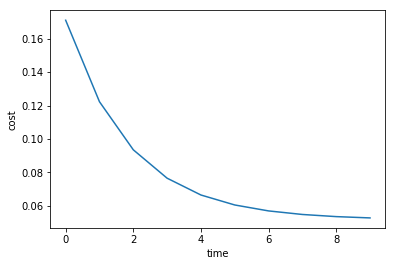

In [86]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

In [87]:
pars, Costs = GradientDescent(train, 1000, 0.002, ['house_age','total_rooms'], [0.1, 0.1, 0])

w =  [0.22840177 0.12962287 0.26424721]
grad = [ 0.00688502 -0.00633186 -0.00802107]


查看梯度下降的方向

Text(0, 0.5, 'cost')

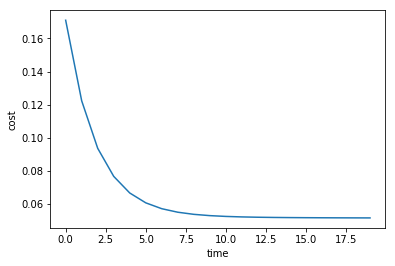

In [88]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

In [70]:
pars, Costs = GradientDescent(train, 200, 0.002, ['house_age','total_rooms'], [0.1, 0.1, 0])

w =  [0.19592222 0.11483044 0.17636317]
grad = [-0.13128943 -0.0236875  -0.25091684]


查看梯度下降的方向

Text(0, 0.5, 'cost')

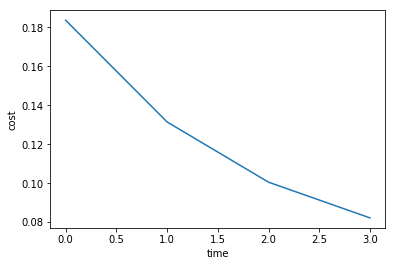

In [71]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

In [64]:
pars, Costs = GradientDescent(train, 500, 0.8, ['house_age','total_rooms'], [0.1, 0.1, 0])

w =  [ 1.65664358e+14 -1.73094445e+14  4.38604370e+13]
grad = [0. 0. 0.]


查看梯度下降的方向

Text(0, 0.5, 'cost')

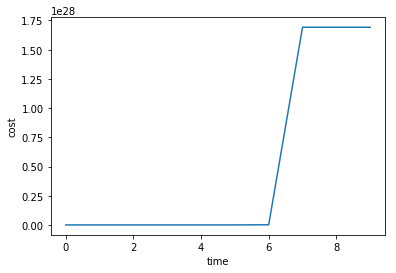

In [65]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

In [66]:
pars, Costs = GradientDescent(train, 500, 0.5, ['house_age','total_rooms'], [0.1, 0.1, 0])

w =  [0.20271738 0.74205173 0.25203466]
grad = [-0.00010553 -0.00103593  0.00013325]


查看梯度下降的方向

Text(0, 0.5, 'cost')

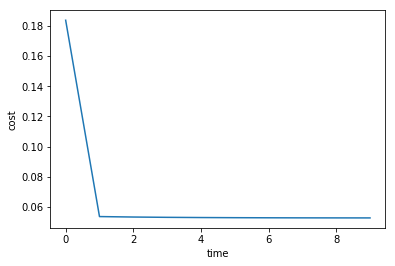

In [67]:
plt.plot(Costs)
plt.xlabel('time')
plt.ylabel('cost')

# 预测和模型评估

用学习出来的模型做预测

In [90]:
cost = Cost(train, ['house_age','total_rooms'], pars)
print (cost)

0.05142924542980133


In [93]:
from sklearn.metrics import mean_squared_error
train['predict'] = linear(train[['house_age','total_rooms']].values, pars)
print ('MSE train: %.3f ' % (mean_squared_error(train['house_value'], train['predict'])))
train.head()

MSE train: 0.051 


,house_age,total_rooms,house_value,predict
8147,0.384615,0.121254,1.000000,0.367811
9747,0.326923,0.033740,0.212600,0.343291
8135,0.807692,0.034083,0.935198,0.453143
6309,0.673077,0.037035,0.179600,0.422780
11659,0.500000,0.004244,0.324999,0.378998


In [96]:
test['predict'] = linear(test[['house_age','total_rooms']].values, pars)
print('MSE test: %.3f' %(mean_squared_error(test['house_value'], test['predict'])))
test.head()

MSE test: 0.054


,house_age,total_rooms,house_value,predict
397,0.673077,0.045786,0.318399,0.423914
15236,1.000000,0.059362,0.743999,0.500344
14469,0.557692,0.158869,0.922398,0.412218
3790,0.673077,0.036244,0.303599,0.422677
1094,0.557692,0.027414,0.166400,0.395179


# 如何做的更好

把之前的模型封装成一个类

In [ ]:
class LinearRegressionGD(object):
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta #学习速率
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[:-1] += self.eta * X.T.dot(errors) #x.T.dot(...)是先求这个矩阵x的转置（.T），再求与点积(.dot)
            self.w_[-1] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 #还未理解代价函数这儿为何除以2?
            self.cost_.append(cost)
        return self
    
    def net_input(self, X): 
        #dot()返回的是两个数组的点积;a.dot(b) 与 np.dot(a,b)效果相同
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return self.net_input(X)
        

解释：上述X = [[x11, x12],[x21, x22],[x31, x32]...]

如下知识，帮助理解numpy.array()和.shape[i]的用法

In [118]:
import numpy as np
y = np.array([1])
s = np.array([1, 2])
t0 = np.array([[1, 2]])
t1 = np.array([[1, 2], [3, 4], [5, 6]])
t2 = np.array([[[1, 2, 3]]])
t3 = np.array([[[1, 2, 3]],[[1, 2 ,4]]]) #2, 1, 3
#x = np.array([[1, 2, 3], [4, 5, 6], [3, 2, 1], [4, 3, 6]])
#x3 = np.array([[[1, 2, 3], [4, 5, 6], [3, 2, 1], [4, 3, 6]], [[1, 2, 3], [4, 5, 6], [3, 2, 1], [4, 3, 6]]])



print (y.shape)
print (y.shape[0])
print (s.shape)
print (s.shape[0])
print (t0.shape)
print (t0.shape[0])
print (t0.shape[1])
print (t1.shape)
print (t2.shape)
print (t3.shape)
#print (x.shape)
#print (x1.shape)


(1,)
1
(2,)
2
(1, 2)
1
2
(3, 2)
(1, 1, 3)
(2, 1, 3)


# 总结：
初级机器学习算法的类，包括以下：
a. 初始化：属性包括学习速率和循环次数
b. 如何使用梯度下降求解参数
c. 测试

## 增加其他特征，课程中数据表格里有区域，将区域转换成一个数字，每个区域就是一个特征

In [ ]:
data_select = pd.get_dummies(data_select) #将代表区域的字符串转换成数字
train, test = train_test_split(data_select.copy(), test_size = 0.9)
train_ = train.copy()
train_y = train_.pop('house_value')
train_x = train_

test_ = test.copy()
test_y = test_.pop('house_value')
test_x = test_

train_x.head()



In [ ]:
lr = LinearRegressionGD( n_iter = 1000)
lr.fit(train_x.values, train_y.values)

In [ ]:
lr.w_
#获得参数

In [ ]:
from sklearn.metric import mean_squared_error
train['predict'] = lr.predict(train_x.values)

In [ ]:
print('MSE train: %.3f' % (mean_squared_error(train_y, train['predict'])))
train.head()

In [ ]:
test['predict'] = lr.predict(test_x.values)
print('MSE train: %.3f' % (mean_squared_error(test_y, test['predict'])))
test.head()